In [2]:
import pandas as pd

In [3]:
import keras

In [4]:
import tensorflow

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("KARURVYSYA.NS3.csv")

In [29]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-24,115.525833,121.073448,115.017654,118.490204,110.743645,2478386
1,2017-08-28,118.151421,121.115791,117.812637,120.141785,112.287254,2172805
2,2017-08-29,119.930046,122.428589,116.965668,117.389153,109.714584,1680499
3,2017-08-30,119.337166,119.972389,118.320816,119.675957,111.851883,1001623
4,2017-08-31,119.040733,121.369881,118.151421,120.522919,112.643478,2221375


In [30]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2022-08-17,65.750000,66.000000,63.299999,64.150002,64.150002,2939232
1231,2022-08-18,64.150002,64.699997,63.000000,64.199997,64.199997,2484655
1232,2022-08-19,64.750000,65.400002,63.250000,64.349998,64.349998,4533852
1233,2022-08-22,64.000000,64.150002,63.049999,63.599998,63.599998,2909613
1234,2022-08-23,63.250000,65.000000,62.549999,64.849998,64.849998,5101640


<AxesSubplot:>

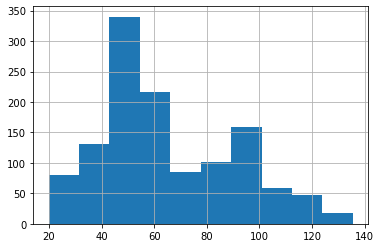

In [31]:
df["Open"].hist()

<AxesSubplot:>

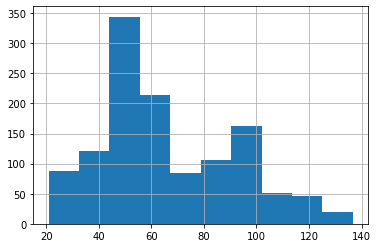

In [32]:
df["High"].hist()

<AxesSubplot:>

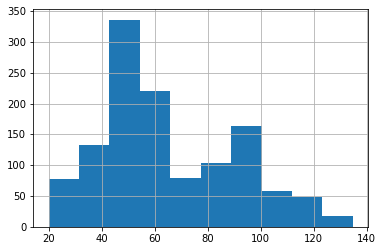

In [33]:
df["Close"].hist()

In [34]:
df1 = df.reset_index()['Close']

In [35]:
df1.shape

(1235,)

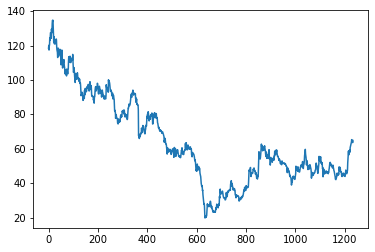

In [36]:
plt.plot(df1)

In [37]:
import numpy as np

In [38]:
df1

0       118.490204
1       120.141785
2       117.389153
3       119.675957
4       120.522919
           ...    
1230     64.150002
1231     64.199997
1232     64.349998
1233     63.599998
1234     64.849998
Name: Close, Length: 1235, dtype: float64

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [40]:
df1.shape

(1235, 1)

In [41]:
print(df1)

[[0.85878964]
 [0.87316878]
 [0.84920358]
 ...
 [0.38742963]
 [0.38089991]
 [0.39178277]]


In [43]:
## TRAIN TEST ABD SPLIT

In [44]:
training_size = int(len(df1)*0.65)
test_size= len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]


In [45]:
training_size, test_size

(802, 433)

In [46]:
#Now splitting the dataset for time series and making it into a matrix

In [48]:
def create_dataset (dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)
        

In [49]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [55]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [56]:
print(X_test.shape), print(y_test.shape)

(332, 100)
(332,)


(None, None)

In [57]:
#Now modelling it for LSTM
#For LSTM the shape should be of 3-d, so we are adding 1 at the end of the train and test.
#The reshaped input should be in the form of [samples,timesteps,features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [58]:
#Creating a Stacked LSTM model


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [60]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = "adam")

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
11/11 [==============================] - 6s 222ms/step - loss: 0.0697 - val_loss: 0.0075
Epoch 2/100
11/11 [==============================] - 1s 134ms/step - loss: 0.0127 - val_loss: 0.0034
Epoch 3/100
11/11 [==============================] - 1s 137ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 4/100
11/11 [==============================] - 1s 136ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 5/100
11/11 [==============================] - 1s 136ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 6/100
11/11 [==============================] - 2s 146ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/100
11/11 [==============================] - 1s 135ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 8/100
11/11 [==============================] - 1s 135ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/100
11/11 [==============================] - 1s 136ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/100
11/11 [==============================] - 1s 136ms/step - loss: 0.0016 - val_lo

11/11 [==============================] - 1s 132ms/step - loss: 4.8177e-04 - val_loss: 5.3817e-04
Epoch 78/100
11/11 [==============================] - 1s 133ms/step - loss: 5.2435e-04 - val_loss: 5.6821e-04
Epoch 79/100
11/11 [==============================] - 1s 133ms/step - loss: 5.3803e-04 - val_loss: 8.1919e-04
Epoch 80/100
11/11 [==============================] - 1s 133ms/step - loss: 6.0585e-04 - val_loss: 4.8754e-04
Epoch 81/100
11/11 [==============================] - 1s 133ms/step - loss: 5.8790e-04 - val_loss: 4.0983e-04
Epoch 82/100
11/11 [==============================] - 1s 132ms/step - loss: 6.9827e-04 - val_loss: 4.0837e-04
Epoch 83/100
11/11 [==============================] - 1s 134ms/step - loss: 6.2368e-04 - val_loss: 6.1745e-04
Epoch 84/100
11/11 [==============================] - 1s 132ms/step - loss: 5.2685e-04 - val_loss: 4.4068e-04
Epoch 85/100
11/11 [==============================] - 1s 137ms/step - loss: 4.6759e-04 - val_loss: 4.9397e-04
Epoch 86/100
11/11 [===

In [63]:
import tensorflow as tf

In [64]:
tf.__version__

'2.7.0'

In [65]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [67]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)



In [68]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))


70.07192594157047

In [70]:
math.sqrt(mean_squared_error(y_test,test_predict))


49.005513584985

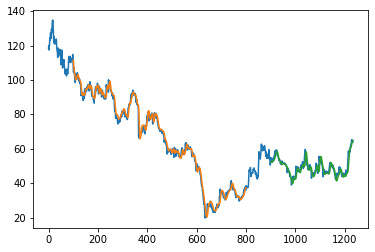

In [73]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [83]:
len(test_data)


433

In [84]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [85]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [86]:
temp_input

[0.23071651220964065,
 0.23028120670909039,
 0.2437759384146713,
 0.25030565151718664,
 0.26380042675418824,
 0.27337732189197583,
 0.2799070349944912,
 0.2812129950275626,
 0.276859852959219,
 0.2651063432558389,
 0.27207136185890446,
 0.26467103775528866,
 0.2672829142900107,
 0.2633650777222174,
 0.26380042675418824,
 0.26249446672111687,
 0.2529175715833294,
 0.26075320118749534,
 0.26684760878946046,
 0.26380042675418824,
 0.25248222255135844,
 0.24769377498246467,
 0.23898749084577756,
 0.23681091981160576,
 0.22853994117546886,
 0.21896304603768127,
 0.21548051497043816,
 0.20938615089989374,
 0.19632672469486304,
 0.19502076466179166,
 0.19371480462872034,
 0.20416235429902904,
 0.20198578326485725,
 0.20851549636737257,
 0.21460990396933774,
 0.22679871917326797,
 0.21939835153823148,
 0.21460990396933774,
 0.21678647500350948,
 0.21983365703878174,
 0.22592806464074686,
 0.21852774053713106,
 0.22592806464074686,
 0.2581413246527734,
 0.24769377498246467,
 0.23768157434412687

In [87]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.38953364]
101
1 day input [0.23028121 0.24377594 0.25030565 0.26380043 0.27337732 0.27990703
 0.281213   0.27685985 0.26510634 0.27207136 0.26467104 0.26728291
 0.26336508 0.26380043 0.26249447 0.25291757 0.2607532  0.26684761
 0.26380043 0.25248222 0.24769377 0.23898749 0.23681092 0.22853994
 0.21896305 0.21548051 0.20938615 0.19632672 0.19502076 0.1937148
 0.20416235 0.20198578 0.2085155  0.2146099  0.22679872 0.21939835
 0.2146099  0.21678648 0.21983366 0.22592806 0.21852774 0.22592806
 0.25814132 0.24769377 0.23768157 0.24899974 0.25596475 0.24812908
 0.23637561 0.23202247 0.23289308 0.23245778 0.21765709 0.21199803
 0.20938615 0.22026901 0.21678648 0.21678648 0.22288088 0.22679872
 0.22375149 0.21852774 0.21852774 0.21069207 0.21243333 0.21199803
 0.20982146 0.22549276 0.22375149 0.24203472 0.235505   0.23202247
 0.22549276 0.22331619 0.23898749 0.23332843 0.24159937 0.27773046
 0.29601364 0.30907307 0.33823915 0.3182147  0.33170943 0.33867445
 0.33867445 0.3434629  0.33258005 

9 day output [[0.3747733]]
10 day input [0.27207136 0.26467104 0.26728291 0.26336508 0.26380043 0.26249447
 0.25291757 0.2607532  0.26684761 0.26380043 0.25248222 0.24769377
 0.23898749 0.23681092 0.22853994 0.21896305 0.21548051 0.20938615
 0.19632672 0.19502076 0.1937148  0.20416235 0.20198578 0.2085155
 0.2146099  0.22679872 0.21939835 0.2146099  0.21678648 0.21983366
 0.22592806 0.21852774 0.22592806 0.25814132 0.24769377 0.23768157
 0.24899974 0.25596475 0.24812908 0.23637561 0.23202247 0.23289308
 0.23245778 0.21765709 0.21199803 0.20938615 0.22026901 0.21678648
 0.21678648 0.22288088 0.22679872 0.22375149 0.21852774 0.21852774
 0.21069207 0.21243333 0.21199803 0.20982146 0.22549276 0.22375149
 0.24203472 0.235505   0.23202247 0.22549276 0.22331619 0.23898749
 0.23332843 0.24159937 0.27773046 0.29601364 0.30907307 0.33823915
 0.3182147  0.33170943 0.33867445 0.33867445 0.3434629  0.33258005
 0.35608702 0.36087547 0.36696988 0.37306428 0.38177057 0.38351183
 0.39613591 0.3856884  

19 day output [[0.3501785]]
20 day input [0.25248222 0.24769377 0.23898749 0.23681092 0.22853994 0.21896305
 0.21548051 0.20938615 0.19632672 0.19502076 0.1937148  0.20416235
 0.20198578 0.2085155  0.2146099  0.22679872 0.21939835 0.2146099
 0.21678648 0.21983366 0.22592806 0.21852774 0.22592806 0.25814132
 0.24769377 0.23768157 0.24899974 0.25596475 0.24812908 0.23637561
 0.23202247 0.23289308 0.23245778 0.21765709 0.21199803 0.20938615
 0.22026901 0.21678648 0.21678648 0.22288088 0.22679872 0.22375149
 0.21852774 0.21852774 0.21069207 0.21243333 0.21199803 0.20982146
 0.22549276 0.22375149 0.24203472 0.235505   0.23202247 0.22549276
 0.22331619 0.23898749 0.23332843 0.24159937 0.27773046 0.29601364
 0.30907307 0.33823915 0.3182147  0.33170943 0.33867445 0.33867445
 0.3434629  0.33258005 0.35608702 0.36087547 0.36696988 0.37306428
 0.38177057 0.38351183 0.39613591 0.3856884  0.38612368 0.38742963
 0.38089991 0.39178277 0.38953364 0.38812646 0.38676667 0.38541004
 0.38398156 0.38242748

27 day output [[0.33126336]]
28 day input [0.19632672 0.19502076 0.1937148  0.20416235 0.20198578 0.2085155
 0.2146099  0.22679872 0.21939835 0.2146099  0.21678648 0.21983366
 0.22592806 0.21852774 0.22592806 0.25814132 0.24769377 0.23768157
 0.24899974 0.25596475 0.24812908 0.23637561 0.23202247 0.23289308
 0.23245778 0.21765709 0.21199803 0.20938615 0.22026901 0.21678648
 0.21678648 0.22288088 0.22679872 0.22375149 0.21852774 0.21852774
 0.21069207 0.21243333 0.21199803 0.20982146 0.22549276 0.22375149
 0.24203472 0.235505   0.23202247 0.22549276 0.22331619 0.23898749
 0.23332843 0.24159937 0.27773046 0.29601364 0.30907307 0.33823915
 0.3182147  0.33170943 0.33867445 0.33867445 0.3434629  0.33258005
 0.35608702 0.36087547 0.36696988 0.37306428 0.38177057 0.38351183
 0.39613591 0.3856884  0.38612368 0.38742963 0.38089991 0.39178277
 0.38953364 0.38812646 0.38676667 0.38541004 0.38398156 0.38242748
 0.3807247  0.37887299 0.37688383 0.37477329 0.37255809 0.37025338
 0.36787316 0.3654308

In [88]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [89]:
import matplotlib.pyplot as plt


In [90]:
len(df1)


1235

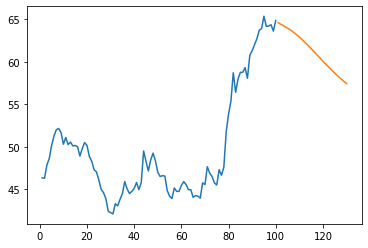

In [91]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

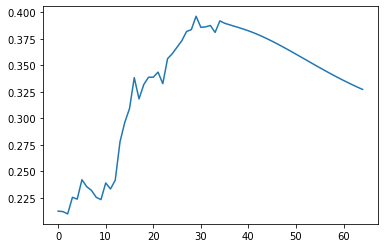

In [92]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [93]:
df3=scaler.inverse_transform(df3).tolist()


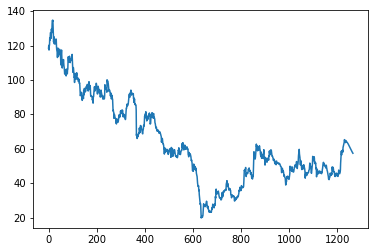

In [94]:
plt.plot(df3)
